# Instalación de dependencias


In [1]:
url_dependencies = "https://github.com/joackob/iol_testing.git"
folder_dependencies = "iol"

In [2]:
import os

if not os.path.exists(f"./{folder_dependencies}/"):
    print("Cloning from github...")
    os.system(f"git clone {url_dependencies} ./{folder_dependencies}/")
else:
    print("Pulling from github...")
    os.system(f"cd {folder_dependencies} && git pull")

Pulling from github...


In [3]:
import sys

pipenv_installed = os.system("pipenv --version")
if pipenv_installed:
    print("Install with pipenv...")
    os.system(f"pipenv install -r ./{folder_dependencies}/requirements.txt")
    os.system(f"pipenv install -r ./requirements.txt")
else:
    print("Install with pip...")
    os.system(f"pip install -r ./{folder_dependencies}/requirements.txt")
    os.system(f"pip install -r ./requirements.txt")

# for import from local
print("Adding path...")
sys.path.append(f"./{folder_dependencies}/")
os.getcwd()

Install with pip...
Adding path...


'c:\\Users\\blanc\\Documents\\Github\\iol-notebooks'

# Bonos e Historialización


In [4]:
import iol.src.api.client as client
import iol.src.api.constants as constants

Se recomienda usar el archivo `.env` para colocar claves privadas, pero este espacio tambien puede ser usado como punto de entrada de datos privados. Tener la debida precaución.


In [5]:
user = os.getenv("IOL_USER") or ""
password = os.getenv("IOL_PASS") or ""

In [6]:
client_iol = client.IOLClient(username=user, password=password)

## Historico anual de un determinado instrumento


In [7]:
from datetime import date
from iol.src.api.constants import Ajustada

hoy = date.today()
hace_un_anio = hoy.replace(year=hoy.year - 1)
historico = await client_iol.get_titulo_historicos(
    simbolo="GGAL",
    mercado=constants.Mercado.BCBA,
    fecha_desde=hace_un_anio,
    fecha_hasta=hoy,
    ajustada=Ajustada.AJUSTADA,
)

In [8]:
import pandas as pd

df = pd.DataFrame(data=historico)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,956.95,0.0,930.85,965.00,926.6,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,925.40,0.0,910.15,932.35,898.0,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,905.80,0.0,930.50,930.50,892.0,2023-07-19 17:00:01.950,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,919.40,0.0,938.45,955.00,913.8,2023-07-18 17:00:01.897,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,920.15,0.0,910.30,950.00,910.3,2023-07-17 17:00:02.680,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


## Guardando los datos


Exportamos datos a un excel


In [9]:
# df.to_excel("historico.xlsx")

Leer datos desde excel


In [10]:
# df = pd.read_excel("historico.xlsx")

## Analisis y visualización


Primera vista de los datos


In [11]:
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,fechaHora,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
0,956.95,0.0,930.85,965.00,926.6,2023-07-21 17:00:01.707,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
1,925.40,0.0,910.15,932.35,898.0,2023-07-20 17:00:01.707,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2,905.80,0.0,930.50,930.50,892.0,2023-07-19 17:00:01.950,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
3,919.40,0.0,938.45,955.00,913.8,2023-07-18 17:00:01.897,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
4,920.15,0.0,910.30,950.00,910.3,2023-07-17 17:00:02.680,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


Cantidad de registros encontrados


In [12]:
df.size

4880

Graficando variables en función del tiempo


In [13]:
df.set_index("fechaHora", inplace=True)
df.head()

,ultimoPrecio,variacion,apertura,maximo,minimo,tendencia,cierreAnterior,montoOperado,volumenNominal,precioPromedio,moneda,precioAjuste,interesesAbiertos,puntas,cantidadOperaciones,descripcionTitulo,plazo,laminaMinima,lote
fechaHora,,,,,,,,,,,,,,,,,,,
2023-07-21 17:00:01.707,956.95,0.0,930.85,965.00,926.6,sube,0.0,1.599643e+09,1675277,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-20 17:00:01.707,925.40,0.0,910.15,932.35,898.0,sube,0.0,1.751828e+09,1902388,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-19 17:00:01.950,905.80,0.0,930.50,930.50,892.0,sube,0.0,1.177543e+09,1302844,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-18 17:00:01.897,919.40,0.0,938.45,955.00,913.8,sube,0.0,1.470814e+09,1593873,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0
2023-07-17 17:00:02.680,920.15,0.0,910.30,950.00,910.3,sube,0.0,1.201918e+09,1297316,0.0,peso_Argentino,0.0,0.0,None,0,None,None,0,0


In [14]:
df.sort_index(inplace=True)

Text(0, 0.5, 'Precio(pesos argentinos)')

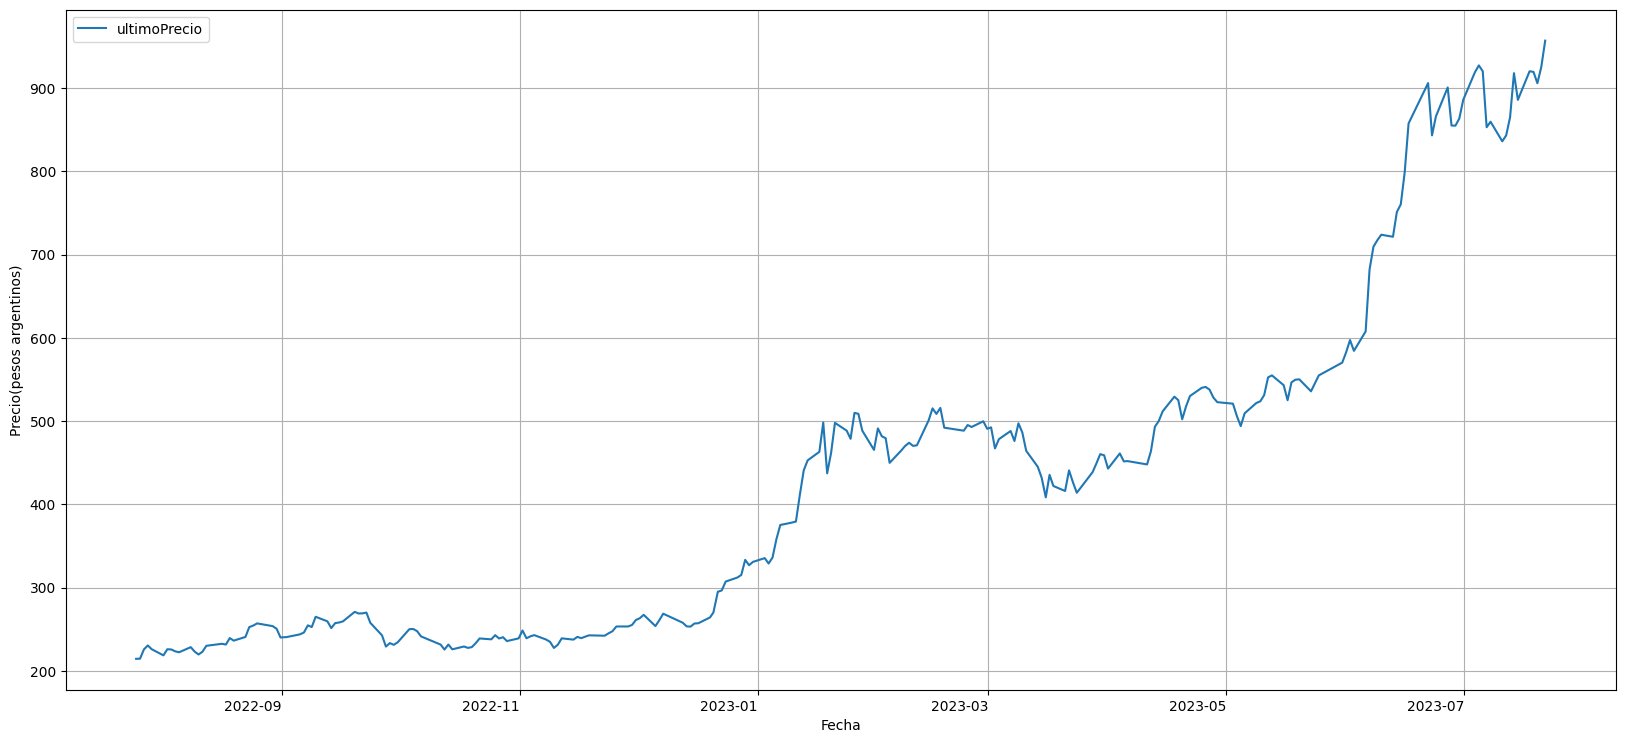

In [16]:

fig = df.plot.line(y="ultimoPrecio", rot=0, figsize=(20, 10), grid=True)
fig.set_xlabel("Fecha")
fig.set_ylabel("Precio(pesos argentinos)")